In [1]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [2]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [3]:
# model
model = Network(5, lr = None)
model.add_layer(DenseLayer(1, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=None, rfn=None))

In [4]:
pso = PSO(dict(m = 50,
    weight_constraint = [-3, 3], 
    velocity_constraint = [-0.1, 0.1],
    c1 = 2,
    c2 = 2,
    w = 1,
    w_decay = 1,
    scale_hyperparameter = False,
    regularizer = None,
    mask = False))

see one see two 2 2


In [5]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = pso, \
    metrics = ['accuracy', 'mean_square_error', 'categorical_crossentropy'])

building layer 1 with 5
24
building layer 2 with 4
15


In [6]:
# data loading
DATA = os.path.join('c:\\Users\\tcumi\\github_repo\\neural-network\\', 'dataset')
GROUP = 2
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 500
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [7]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)

In [8]:
# learning phase
breakpoint = 100
checkpoints = list()
history = list()
for century in range(0, EPOCHS, breakpoint):
    sub_history = model.fit(x_train, y_train, breakpoint, verbose = 0)
    score = model.evaluate(x_test, y_test, False, verbose = 0)
    print('Checkpoint {}, Accuracy: {}, Loss: {}'.format(century+breakpoint, score['accuracy'], score[model.loss_fn]))
    score['checkpoint'] = century + breakpoint
    checkpoints.append(score)
    history.extend(sub_history)

Checkpoint 100, Accuracy: 0.8580246913580247, Loss: 0.5751203960842557
Checkpoint 200, Accuracy: 0.8641975308641975, Loss: 0.5760685956036603
Checkpoint 300, Accuracy: 0.8641975308641975, Loss: 0.5691879413746022


C:\Users\tcumi\github_repo\neural-network\python\activations.py:14: RuntimeWarning: overflow encountered in exp
  y = 1 / (1 + np.exp(-Xi))


Checkpoint 400, Accuracy: 0.8580246913580247, Loss: 0.576314714219835
Checkpoint 500, Accuracy: 0.8703703703703703, Loss: 0.5666735967000326


In [9]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for xi, yi in zip(x, y_list):
        ax.plot(xi, yi)
    if x_label is not None and y_label is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title='{} VS {}'.format(x_label, y_label))
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

In [10]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [[0.92907006]
 [0.04606841]
 [0.02486154]]
[1. 0. 0.] <-> [[0.909936  ]
 [0.05889402]
 [0.03116994]]
[1. 0. 0.] <-> [[0.9089656 ]
 [0.05954924]
 [0.03148523]]
[1. 0. 0.] <-> [[0.5413489 ]
 [0.24788468]
 [0.21076648]]
[1. 0. 0.] <-> [[0.90522796]
 [0.06235483]
 [0.03241716]]
[1. 0. 0.] <-> [[0.93159443]
 [0.04481239]
 [0.02359319]]
[0. 1. 0.] <-> [[0.5389126 ]
 [0.24767075]
 [0.21341665]]
[0. 0. 1.] <-> [[0.03269868]
 [0.5509975 ]
 [0.4163038 ]]
[0. 1. 0.] <-> [[0.47944233]
 [0.27488443]
 [0.24567316]]
[1. 0. 0.] <-> [[0.90518636]
 [0.06249334]
 [0.03232031]]
[1. 0. 0.] <-> [[0.908997  ]
 [0.05952779]
 [0.0314751 ]]
[1. 0. 0.] <-> [[0.48248935]
 [0.273627  ]
 [0.24388365]]
[1. 0. 0.] <-> [[0.75877297]
 [0.14112368]
 [0.10010329]]
[0. 1. 0.] <-> [[0.55462486]
 [0.24965714]
 [0.19571804]]
[0. 0. 1.] <-> [[0.02471572]
 [0.48860914]
 [0.48667514]]
[0. 1. 0.] <-> [[0.03714897]
 [0.57159543]
 [0.39125556]]
[1. 0. 0.] <-> [[0.9329575 ]
 [0.04385369]
 [0.02318883]]
[0. 0. 1.] <->

C:\Users\tcumi\github_repo\neural-network\python\activations.py:14: RuntimeWarning: overflow encountered in exp
  y = 1 / (1 + np.exp(-Xi))


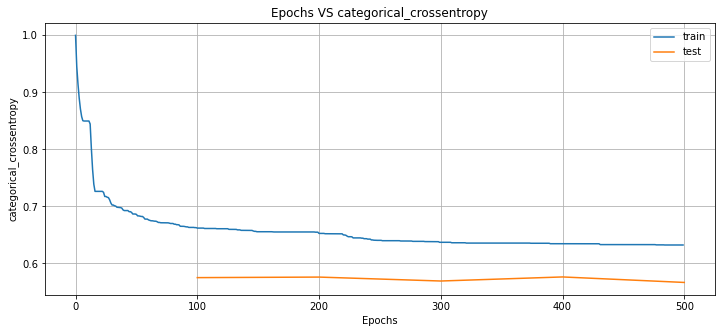

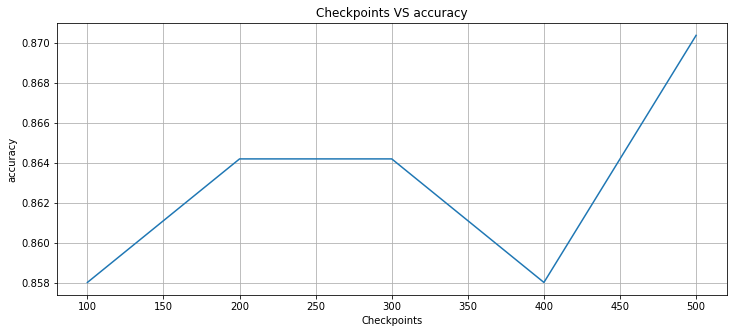

In [11]:
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [history, [ ckp[model.loss_fn] for ckp in checkpoints ]], x_label = 'Epochs', \
    y_label = model.loss_fn, legend=['train', 'test'])
acc = [ ckp['accuracy'] for ckp in checkpoints ]
draw_plot(x = [[(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [acc], x_label = 'Checkpoints', \
    y_label = 'accuracy')

In [12]:
for checkpoint in checkpoints:
    print(checkpoint, '\n\n')

{'accuracy': 0.8580246913580247, 'mean_square_error': 2.866757109627233, 'categorical_crossentropy': 0.5751203960842557, 'essential_metrics': {0: {'tp_hit': 76, 'fp_hit': 13, 'tn_hit': 15, 'fn_hit': 4}, 1: {'tp_hit': 2, 'fp_hit': 6, 'tn_hit': 87, 'fn_hit': 13}, 2: {'tp_hit': 7, 'fp_hit': 4, 'tn_hit': 91, 'fn_hit': 6}}, 'checkpoint': 100} 


{'accuracy': 0.8641975308641975, 'mean_square_error': 2.888522048991206, 'categorical_crossentropy': 0.5760685956036603, 'essential_metrics': {0: {'tp_hit': 77, 'fp_hit': 14, 'tn_hit': 14, 'fn_hit': 3}, 1: {'tp_hit': 5, 'fp_hit': 8, 'tn_hit': 85, 'fn_hit': 10}, 2: {'tp_hit': 4, 'fp_hit': 0, 'tn_hit': 95, 'fn_hit': 9}}, 'checkpoint': 200} 


{'accuracy': 0.8641975308641975, 'mean_square_error': 2.9356503411190147, 'categorical_crossentropy': 0.5691879413746022, 'essential_metrics': {0: {'tp_hit': 78, 'fp_hit': 14, 'tn_hit': 14, 'fn_hit': 2}, 1: {'tp_hit': 4, 'fp_hit': 7, 'tn_hit': 86, 'fn_hit': 11}, 2: {'tp_hit': 4, 'fp_hit': 1, 'tn_hit': 94, 'fn_hit

In [13]:
print(model)

Layer 1
Neuron 0: weights:
[[ 0.9590298 ]
 [-0.67676854]
 [-1.7657114 ]
 [ 0.03172035]
 [-0.5698755 ]]
 bias: [3.]

Neuron 1: weights:
[[-2.1667945]
 [-2.037906 ]
 [-2.072879 ]
 [-1.5876449]
 [-3.       ]]
 bias: [-2.3827174]

Neuron 2: weights:
[[-0.8399961]
 [ 1.4068499]
 [-2.0967934]
 [ 0.667236 ]
 [-1.8797932]]
 bias: [-0.00982712]

Neuron 3: weights:
[[ 1.8846443 ]
 [-0.5758764 ]
 [-0.84307206]
 [-0.8276947 ]
 [ 1.0613381 ]]
 bias: [-3.]

$
Layer 2
Neuron 0: weights:
[[ 2.7514951]
 [ 2.6151175]
 [-3.       ]
 [-2.2650445]]
 bias: [-2.7937598]

Neuron 1: weights:
[[-1.9566598 ]
 [-1.1704274 ]
 [ 0.22927296]
 [-1.1913353 ]]
 bias: [-0.2091508]

Neuron 2: weights:
[[-0.7683618 ]
 [-1.8643873 ]
 [ 0.57110953]
 [ 2.478113  ]]
 bias: [-1.7404759]

$

